In [1]:
!pip install multipledispatch

In [2]:
import sys
sys.path.append('..')
from p3wgan.experiments import ToyP3WGAN, ToyModelsCreator, QuadraticTransportCostCreator, ToyDistributionCreator
from p3wgan.launcher import ExperimentLauncher

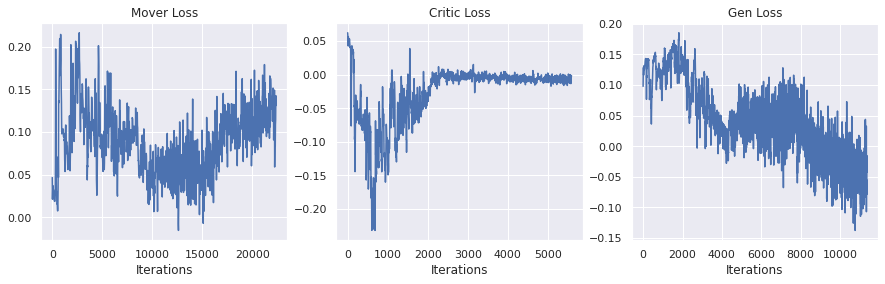

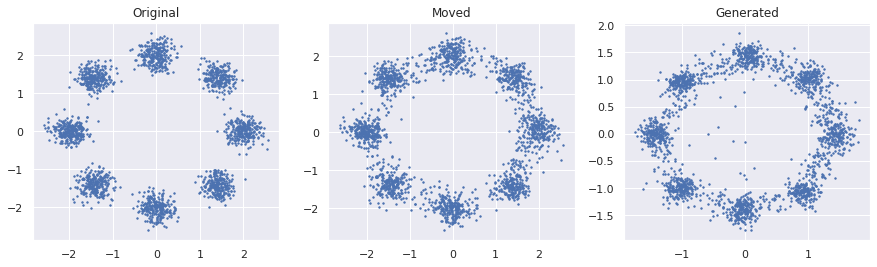

In [12]:
launcher = ExperimentLauncher()

with launcher.localize(device='cuda', num_iter_per_epoch=1000):
    launcher.launch(ToyModelsCreator())
    launcher.launch(ToyDistributionCreator(), hid_dim=32, z_dim=4)
    launcher.launch(QuadraticTransportCostCreator())
    with launcher.localize(
        num_epochs=40, draw_images=True, gamma_min=0.1, gamma_max=1.,
        learning_rate=0.0001, num_training_generator=2, num_training_mover=4):
        launcher.launch(ToyP3WGAN())